In [1]:
## Save the vol curve for each TAVR patient

import os
import glob
import matplotlib
import math
import pandas as pd
import nibabel as nb
import matplotlib.pyplot as plt
import numpy as np

TAVR_names = pd.read_excel('/Users/andersonscott/Desktop/TAVR_CT_Scans_CVC_Names_analyzed.xlsx')
patient_file_directory = '/Volumes/MainShare/projects/tavr_function'
patients = glob.glob(os.path.join(patient_file_directory,'*'))

TAVR_CNR = pd.read_excel('TAVR_CNR.xlsx')
patient_file = '/Volumes/MainShare/projects/tavr_function'


In [76]:
TAVR_names['ES'] = float('NaN')
TAVR_names['ED'] = float('NaN')
TAVR_names['EF'] = float('NaN')
TAVR_names['Vol Curve'] = float('NaN')

vol_list_all = []
es_list = []
ed_list = []
ef_list = []
for i,TAVR_name in enumerate(TAVR_names['CVC Name']):
    print(TAVR_name)
    if math.isnan(TAVR_names.loc[TAVR_names['CVC Name'] == TAVR_name, 'CNR']):
        vol_list_all.append(float('NaN'))
        es_list.append(float('NaN')) 
        ed_list.append(float('NaN')) 
        ef_list.append(float('NaN')) 
        continue
    
    seg_path = os.path.join('/Volumes/MainShare/projects/tavr_function', TAVR_name)
    segs_pred = glob.glob(seg_path+'/naive-pred-seg/*.nii.gz')

    img_file = nb.load(os.path.join(seg_path,'img-nii/0.nii.gz'))

    pixdim = img_file.header['pixdim']
    ok = pixdim[pixdim>0]
    assert len(ok) == 3

    voldim = ok[0]*ok[1]*ok[2]
    
    vol_list = []
    for seg_pred in segs_pred:   
        seg_file = nb.load(seg_pred)
        seg_img = seg_file.get_fdata()
        vol = np.sum(seg_img)*voldim
        vol_list.append(vol)

    ES = np.min(vol_list)
    ED = np.max(vol_list)
    EF = 100*(ED - ES) / ED
    print(ES)
    
    es_list.append(ES)
    ed_list.append(ED)
    ef_list.append(EF)
    vol_list_all.append(vol_list)
    
    #loading bar
    prctdone = (100*i/len(TAVR_names['CVC Name']))
    loadingbar = u'\u2588' * round(prctdone/5) + '.'*(20-round(prctdone/5))
    print(loadingbar+' '+str(round(prctdone))+'% complete',end='\r')
    

CVC1505280957
CVC1506121406
CVC1706280900
CVC1708312050
CVC1709041420
CVC1811052038
73054.21080306172
CVC1903111026....... 2% complete
60754.94384765625
CVC1909091028....... 2% complete
75688.97785529494
CVC1909261547....... 3% complete
37678.48369324207
CVC1910291016....... 3% complete
50067.55352050066
CVC1911071042....... 4% complete
70117.03290471435
CVC1911191729....... 4% complete
190739.395986557
CVC1911251042....... 4% complete
161668.97441385686
CVC1912161410....... 5% complete
120009.06387448311
CVC1912231021....... 5% complete
137293.25375506282
CVC1912301448....... 6% complete
112412.0393628627
CVC2001020922....... 6% complete
126239.00673151016
CVC2001091009....... 7% complete
89868.73626708984
CVC2001131502....... 7% complete
51721.77110171318
CVC2001141050....... 7% complete
76568.05011034012
CVC2001161230....... 8% complete
CVC2001230926
88356.80613574386
CVC2001231003....... 9% complete
177804.07953037322
CVC2001231518....... 9% complete
114329.04493063688
CVC200203102

54133.229196578264
CVC2204251131███.... 80% complete
67422.17476129532
CVC2204251435███.... 80% complete
75444.94709931314
CVC2204260823███.... 81% complete
50303.619960963726
CVC2204281128███.... 81% complete
75535.93058407307
CVC2205031442███.... 82% complete
27345.343916594982
CVC2205161034███.... 82% complete
36188.34679277241
CVC2205161537████... 83% complete
56807.61569403112
CVC2205240857████... 83% complete
78822.0051330775
CVC2205261038████... 83% complete
78998.31849756092
CVC2206020956████... 84% complete
117583.5523813963
CVC2206061025████... 84% complete
38596.29544347525
CVC2206090933████... 85% complete
67644.64887200296
CVC2206091053████... 85% complete
234002.6147031784
CVC2206091527████... 85% complete
129825.54240055382
CVC2206131005████... 86% complete
62563.58145207167
CVC2206131605████... 86% complete
81572.23661890626
CVC2206171538████... 87% complete
15735.797971263528
CVC2206221112████... 87% complete
92817.34985351562
CVC2206270919████... 87% complete
82658.18

In [78]:
TAVR_names['ES'] = es_list
TAVR_names['ED'] = ed_list
TAVR_names['EF'] = ef_list
TAVR_names['Vol Curve'] = vol_list_all

In [80]:
TAVR_names.to_excel('/Users/andersonscott/Desktop/TAVR_CT_Scans_CVC_Names_analyzed.xlsx', index = False)

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


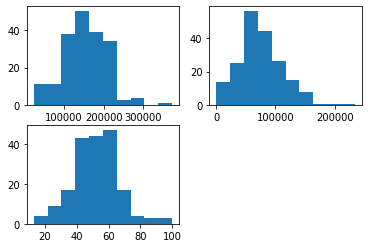

In [2]:
plt.subplot(2,2,1)
plt.hist(TAVR_names['ED'])
plt.subplot(2,2,2)
plt.hist(TAVR_names['ES'])
plt.subplot(2,2,3)
plt.hist(TAVR_names['EF'])
plt.show()

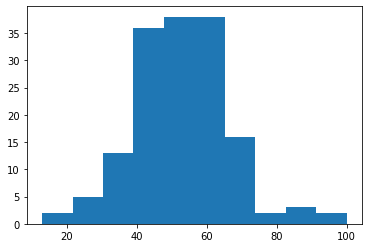

In [3]:
plt.hist(TAVR_names.loc[TAVR_names['CNR'] > 3, 'EF'])
plt.show()

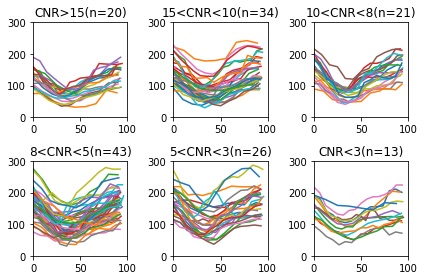

In [90]:
cnr_cutoffs = [15, 10, 8, 5, 3]
counter = [0, 0, 0, 0,0,0]
num_subplot_x = 2
num_subplot_y = 3
ylim = 300

indx_to_analyze = []

for i, vol_curve in enumerate(TAVR_names['Vol Curve']):
    if not isinstance(vol_curve,float): #only nans are floats
        vol_curve = [float(num_str) for num_str in vol_curve.strip('[]').split(', ')]
        x = np.arange(len(vol_curve))*(100/len(vol_curve))
        #y = np.array(vol_curve)/vol_curve[0]
        y = np.array(vol_curve)/1000
        
        
        # Frame to frame change
        delta = abs(y[:-1] - y[1:])
        if np.sum(delta > 75):
            continue
        
        if np.sum(y < 50) > 0.5*len(y):
            continue
        
        # Remove curves with huge SV (ie if there is a 0 prediction or if all predictions are small)
        SV = (TAVR_names.loc[i, 'ED'] - TAVR_names.loc[i, 'ES'])/1000
#        if SV > 100 or SV < 50:
#            continue
            
        # Remove non-U shaped curves
        if TAVR_names.loc[i, 'CNR'] > 0: 
            num_valley_pts = np.sum((y < min(y[0],y[-1]))*1)
            if num_valley_pts < 0.4*len(y):
                continue

                
        if TAVR_names.loc[i, 'CNR'] > 0: 
            indx_to_analyze.append(i)
        
        if TAVR_names.loc[i, 'CNR'] > 15:
            plt.subplot(2,3,1)
            plt.plot(x,y)
            counter[0] += 1
        elif TAVR_names.loc[i, 'CNR'] > 10:
            plt.subplot(2,3,2)
            plt.plot(x,y)
            counter[1] += 1
        elif TAVR_names.loc[i, 'CNR'] > 8:
            plt.subplot(2,3,3)
            plt.plot(x,y)
            counter[2] += 1
        elif TAVR_names.loc[i, 'CNR'] > 5:
            plt.subplot(2,3,4)
            plt.plot(x,y)
            counter[3] += 1
        elif TAVR_names.loc[i, 'CNR'] > 3:
            plt.subplot(2,3,5)
            plt.plot(x,y)
            counter[4] += 1
        else:
            plt.subplot(2,3,6)
            plt.plot(x,y)
            counter[5] += 1


for i in range(len(counter)):
    plt.subplot(num_subplot_x,num_subplot_y,i+1)
    plt.xlim([0,100])
    plt.ylim([0, ylim])
    if i == 0:
        plt.title('CNR>'+str(cnr_cutoffs[i])+'(n='+str(counter[i])+')')
    elif i == len(counter)-1:
        plt.title('CNR<'+str(cnr_cutoffs[i-1])+'(n='+str(counter[i])+')')
    else:
        plt.title(str(cnr_cutoffs[i-1])+'<CNR<'+str(cnr_cutoffs[i])+'(n='+str(counter[i])+')')

plt.tight_layout()
plt.show()

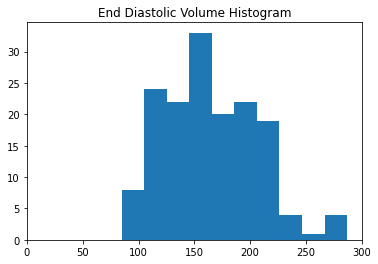

In [95]:
plt.hist(TAVR_names.loc[indx_to_analyze,'ED']/1000)
plt.title('RV End Diastolic Volume Histogram')
plt.xlim([0,300])
plt.show()


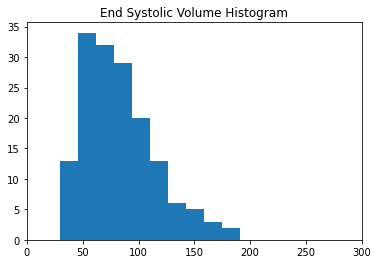

In [96]:
plt.hist(TAVR_names.loc[indx_to_analyze,'ES']/1000)
plt.title('RV End Systolic Volume Histogram')
plt.xlim([0,300])
plt.show()

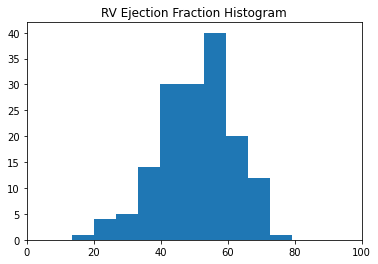

In [97]:
plt.hist(TAVR_names.loc[indx_to_analyze,'EF'])
plt.title('RV Ejection Fraction Histogram')
plt.xlim([0,100])
plt.show()

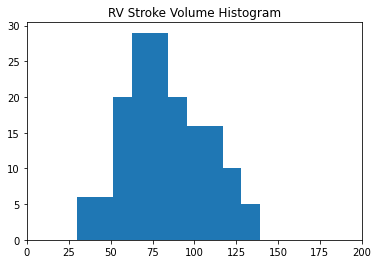

In [100]:
plt.hist(TAVR_names.loc[indx_to_analyze,'ED']/1000-TAVR_names.loc[indx_to_analyze,'ES']/1000)
plt.title('RV Stroke Volume Histogram')
plt.xlim([0, 200])
plt.show()

In [115]:
SV = TAVR_names.loc[indx_to_analyze,'EF']/100 * TAVR_names.loc[indx_to_analyze,'ED']/1000
perc_enlarged_ED = np.sum(TAVR_names.loc[indx_to_analyze,'ED']/1000 > 160)/1.57
perc_enlarged_ES = np.sum(TAVR_names.loc[indx_to_analyze,'ES']/1000 > 100)/1.57
perc_SV = (np.sum(np.array(SV) > 90)+np.sum(np.array(SV) < 50))/1.57
perc_reduced_EF = np.sum(TAVR_names.loc[indx_to_analyze,'EF'] < 40)/1.57
perc_reduced_EF += np.sum(TAVR_names.loc[indx_to_analyze,'EF'] > 70)/1.57

print(perc_enlarged_ED, perc_enlarged_ES, perc_SV, perc_reduced_EF)


50.318471337579616 23.56687898089172 44.58598726114649 17.8343949044586


In [121]:
TAVR_names['Valid_Vol_Curve'] = False
TAVR_names.loc[indx_to_analyze,'Valid_Vol_Curve'] = True

TAVR_names.to_excel('/Users/andersonscott/Desktop/TAVR_CT_Scans_CVC_Names_analyzed.xlsx', index = False)



In [84]:
np.sum(counter)

157

In [79]:
np.sum(abs(y[:-1] - y[1:]) > 75)

0

In [87]:
orig = [21,36,23,44,31,36]
post = [1,2,2,1,3,23]

np.divide(post,orig)

array([0.04761905, 0.05555556, 0.08695652, 0.02272727, 0.09677419,
       0.63888889])

In [89]:
32/191

0.16753926701570682

In [116]:
TAVR_names.loc[indx_to_analyze,'Valid_Vol_Curve'] = True

In [119]:
TAVR_names['Valid_Vol_Curve'] = False
TAVR_names.loc[indx_to_analyze,'Valid_Vol_Curve'] = True

In [120]:
TAVR_names

,Study ID,CVC Name,Location,Aorta scan,Chest scan,Function scan,RR filenames,CNR,new,ES,ED,EF,Vol Curve,Valid_Vol_Curve
0,202,CVC1505280957,NaN,False,False,False,NaN,NaN,test,NaN,NaN,NaN,NaN,False
1,108,CVC1506121406,/Volumes/McVeighLab/wip/ucsd_tavr_2023_outcome...,False,False,False,NaN,NaN,test,NaN,NaN,NaN,NaN,False
2,221,CVC1706280900,NaN,False,False,False,NaN,NaN,test,NaN,NaN,NaN,NaN,False
3,221,CVC1708312050,NaN,False,False,False,NaN,NaN,test,NaN,NaN,NaN,NaN,False
4,91,CVC1709041420,NaN,False,False,False,NaN,NaN,test,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,277,CVC2210312059,NaN,False,False,False,NaN,NaN,test,NaN,NaN,NaN,NaN,False
242,281,CVC2211041526,/Volumes/MainShare-1/dicom_images/2022/11/CVC2...,True,False,True,['/Volumes/MainShare-1/dicom_images/2022/11/CV...,17.727455,test,60259.979248,114227.500610,47.245647,"[92374.90356445312, 83180.18859863281, 70273.3...",True
243,283,CVC2211301449,/Volumes/MainShare-1/dicom_images/2022/11/CVC2...,True,False,True,['/Volumes/MainShare-1/dicom_images/2022/11/CV...,5.073973,test,102876.178309,173120.042243,40.575235,"[162815.93026913702, 146671.45575240254, 11779...",True
244,284,CVC2212131455,/Volumes/MainShare-1/dicom_images/2022/12/CVC2...,True,False,True,['/Volumes/MainShare-1/dicom_images/2022/12/CV...,10.308051,test,83712.330035,147342.952990,43.185386,"[147342.95298971236, 118441.43174059689, 90239...",True


In [152]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import pandas as pd
import glob

patients = glob.glob('/Volumes/MainShare/projects/tavr_function/CVC*')
TAVR_names = pd.read_excel('/Users/andersonscott/Desktop/TAVR_CT_Scans_CVC_Names_analyzed.xlsx')

for i,TAVR_name in enumerate(TAVR_names['CVC Name']):
    if TAVR_names['Valid_Vol_Curve'][i]:
        print(TAVR_name)
        img = [] # some array of images
        frames = [] # for storing the generated images
        fig = plt.figure()
        
        scan_file = '/Volumes/MainShare/projects/tavr_function/'+TAVR_name+'/img-nii/0.nii.gz'
        scan = nb.load(scan_file)
        scan_img = scan.get_fdata()
        
        seg_file = '/Volumes/MainShare/projects/tavr_function/'+TAVR_name+'/naive-pred-seg/pred-s-0.nii.gz'
        seg = nb.load(seg_file)
        seg_img = seg.get_fdata()
        seg_img = getlargestCC(seg_img)
        
        for i in range(0,scan_img.shape[2],10):
            frames.append([plt.imshow(scan_img[:,:,i], cmap=cm.Greys_r), plt.imshow(seg_img[:,:,i],alpha = 0.2)])

        ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                        repeat_delay=1000)
        writergif = animation.PillowWriter(fps=10)
        ani.save('/Volumes/MainShare/projects/tavr_function/'+TAVR_name+'/seg_visualization.gif',writer=writergif)
        plt.close()
        del scan, scan_img
        del seg, seg_img
        

CVC1811052038
CVC1909091028
CVC1909261547
CVC1910291016
CVC1911071042
CVC1911191729
CVC1911251042
CVC1912161410
CVC1912231021
CVC1912301448
CVC2001020922
CVC2001091009
CVC2001131502
CVC2001141050
CVC2001230926
CVC2001231003
CVC2001231518
CVC2002031023
CVC2002041554
CVC2002101023
CVC2002121509
CVC2002131112
CVC2002211036
CVC2003061127
CVC2003091442
CVC2003111432
CVC2003111557
CVC2003121354
CVC2003121532
CVC2003161315
CVC2003300949
CVC2004211016
CVC2004300911
CVC2005041451
CVC2005111316
CVC2005121512
CVC2005130922
CVC2005211323
CVC2006012132
CVC2006031448
CVC2006071521
CVC2006261310
CVC2007061335
CVC2007201351
CVC2007270935
CVC2007271444
CVC2008030907
CVC2008060947
CVC2008201002
CVC2008201438
CVC2008241442
CVC2009041444
CVC2009230940
CVC2010051103
CVC2010051459
CVC2010052018
CVC2010071122
CVC2010081502
CVC2010140918
CVC2012031504
CVC2101251434
CVC2102020957
CVC2102120946
CVC2102191809
CVC2103151807
CVC2103261043
CVC2104081501
CVC2104121418
CVC2105040933
CVC2105101441
CVC2105201451
CVC210

In [144]:
from skimage.measure import label    

def getlargestCC(seg_img):
    labels = label(seg_img)
    unique, counts = np.unique(labels, return_counts=True)
    list_seg=list(zip(unique, counts))[1:] # the 0 label is by default background so take the rest
    largest=max(list_seg, key=lambda x:x[1])[0]
    labels_max=(labels == largest).astype(int)
    return labels_max

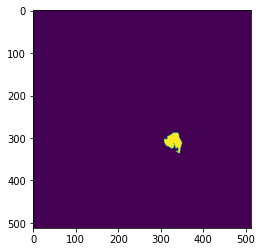

In [143]:
plt.imshow(labels_max[:,:,30])
plt.show()

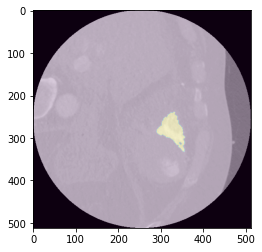

In [151]:
import matplotlib.cm as cm

plt.imshow(scan_img[:,:,40], cmap=cm.Greys_r)
plt.imshow(seg_img[:,:,40],alpha = 0.2)